## Name: Robin Giller

## Student ID: 18204902

## CS_5014 Project 5

# Description

## Summary:
This project focuses on support vector machines and the use of additional constraints to make their output more "fair" for samples with specific values of sensitive features. To fit the support vector classifier to the datasets tested, the CVXOPT optimiser is used and the dual form of the SVM optimisation problem is input to this. The dual form and the constraints for the standard SVM classifier and the "fair" SVM classifier are explained below. The standard SVM classifier implementation in CVXOPT has been provided as a reference for this project and the fair SVM classifier is implemented as a class. This class allows the use of both linear and non-linear kernels in the support vector machine. The fair SVM implementation is used to classify three separate data sets to compare the output behaviour for both standard and fair SVM.

The section below outlines the theory underlying the dual form representation of the support vector machine.

## Theory:
The standard constrained optimisation problem is given as:

minimise $Loss(x)$
given constraints $g(x) \leq 0$ and $h(x) = 0$

For the soft margin SVM, the loss and constraint equations are below.

### Loss: 
$L(w,\epsilon) = \dfrac{w^2}{2} + C \sum_{i=1}^N(\epsilon_i)$

where $w$ is the optimisation parameter, $C$ is the regularisation constant and $\epsilon$ penalises the number of data points falling inside the derived margin.

### Constraints:

(i) $1 - \epsilon - y(wx + b) \leq 0$

(ii) $-\sum_{i=1}^N(\epsilon_i) \leq 0$

### Lagrangian and dual form:
To solve this optimisation problem, the dual form of the Lagrangian can be derived as below. This is what the CVXOPT program optimises for:

$$
\mathcal{L}(w,b,\epsilon,\alpha,\beta) = \dfrac{w^2}{2} + C \sum_{i=1}^N(\epsilon_i) + \sum_{i=1}^N \alpha_i [1 - \epsilon - y(wx + b)]
+ \beta[-\sum_{i=1}^N(\epsilon_i)]
$$

Here $\alpha$ and $\beta$ are the Lagrangian multipliers for the respective inequality constraints. Using partial differentiation wrt to the optimisation parameters $w$, $b$ and $\epsilon$, allows us to reduce this Lagrangian to the dual form as below

$\dfrac{\partial \mathcal{L}}{\partial w} = w - \sum_{i=1}^N \alpha_i y_i x_i = 0$

$\therefore w = \sum_{i=1}^N \alpha_i y_i x_i$ 


$\dfrac{\partial \mathcal{L}}{\partial b} = - \sum_{i=1}^N \alpha_i y_i = 0$

$\therefore \sum_{i=1}^N \alpha_i y_i = 0$ 


$\dfrac{\partial \mathcal{L}}{\partial \epsilon} = C - \alpha - \beta = 0$

Since $\beta \geq 0$ by definition of lagrange multipliers, $C \geq \alpha$ becomes a further constraint in the dual form


Substituting these formulae into the Lagrangian equation yields the dual form optimisation problem:

$$
maximise \mathcal{L}(\alpha) = \sum_{i=1}^N \alpha_i - \dfrac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j x_i^T x_j
$$

or equivalently, replacing the $x_i^T x_j$ product with $K(x_i,x_j)$, where K defines the kernel operation (linear or non-linear)

$$
minimise \mathcal{L}(\alpha) = \dfrac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j K(x_i,x_j) - \sum_{i=1}^N \alpha_i
$$

subject to

$ 0 \leq \alpha \leq C$ and $\sum_{i=1}^N \alpha_i y_i = 0$


### CVXOPT translation:
The above optimisation problem can easily be transformed into the standard form of the CVXOPT problem given by:

\begin{align*}
&\min\limits_{{\bf x}} \frac{1}{2} {\bf x}^T {\bf P} {\bf x} +  {\bf q}^T{\bf x}\\
&s.t.\\
& {\bf G} {\bf x}\leq {\bf h }\\
&{\bf A} {\bf x}={\bf b}
\end{align*}

where ${\bf P},{\bf A}, {\bf G}, {\bf q}, {\bf h}, {\bf b}$ are given matrices (or vector ${\bf q}, {\bf h}, {\bf b}$) of numbers.


This defines the approach for numerical optimisation of the standard regularised SVM optimisation.

## Fair SVM classification:
For fair classification, additional constraints are added to the optimisation problem. A set of sensitive features are defined for the samples in the given dataset. The use of these features in the standard SVM classifier may introduce an unfair bias in the mean classification of samples with specific sensitive feature values (for example, the use of "gender" or "race" attributes to perform classification may have unfair biases built into the labelled training data). For the paper which forms the focus of this project, sensitive features are removed from the dataset before training and used to build a sensitive feature matrix $z$, which imposes constraints on the classification optimiser. For a specific data sample, the decision boundary fairness is measured using the covariance between the sample's sensitive features $z$ and the signed distance from the sample's feature vectors to the decision boundary.

For linear models of classification, such as SVM in this case, the decision boundary is defined by the hyperplane $w^Tx = 0$, where $x$ is the sample's feature values. Given this boundary, the covariance between $z$ and $x$ for a sample reduces to 

$\dfrac{1}{N}\sum_{i=1}^N(z_i - \bar{z}) wx_i$

To impose a fairness constraint on the classification optimiser, this covariance is constrained to be contained within a defined threshold $c$. Thus the fair classifier imposes two additional constraints:

(iii) $\dfrac{1}{N}\sum_{i=1}^N(z_i - \bar{z}) wx_i - c \leq 0$

(iv) $-\dfrac{1}{N}\sum_{i=1}^N(z_i - \bar{z}) wx_i - c \leq 0$

### Lagrangian dual form:
To solve this new constrained optimisation problem, the dual form of the lagrangian is given by the formulae below. Note the correction of typo in the paper equation (10), where the optimisation problem involves minimising $-\sum \alpha$, rather than $+\sum \alpha$:

minimise $-\sum_{i=1}^N \alpha_i + \sum_{i=1}^N \alpha_i y_i (g_{\alpha} (x_i) + h_{\alpha} (x_i))$

subject to $\alpha_i \geq 0,$

$\sum_{i=1}^N \alpha_i y_i = 0,$

$\dfrac{1}{N}\sum_{i=1}^N(z_i - \bar{z}) g_{\alpha}(x_i) \leq c,$

$\dfrac{1}{N}\sum_{i=1}^N(z_i - \bar{z}) g_{\alpha}(x_i) \geq -c$


where $g_{\alpha} (x_i) = \sum_{j=1}^N \alpha_j y_j K(x_i,x_j)$ and $h_{\alpha}(x_i) = \sum_{j=1}^N \alpha_j y_j \dfrac{1}{C} I$

### In CVXOPT form:
Converting to CVXOPT formulation:

minimise $ \alpha + \dfrac{1}{2}\alpha H \alpha$

where $ H = y_i y_j [K(x_i,x_j) + \dfrac{1}{C} * I]$

so in CVXOPT, $P = H, q = I, A = y, b = 0, $

$G_1 = -I, h_1 = 0, $

$G_2 = \dfrac{1}{N}\sum_{i=1}^N(z_i - \bar{z}) y K(x_i,x_j), h_2 = c, $

$G_3 = - \dfrac{1}{N}\sum_{i=1}^N(z_i - \bar{z}) y K(x_i,x_j), h_3 = c$

$G = [G_1, G_2, G_3]$ and $h = [h_1, h_2, h_3]$

# Define Standard Hard and Soft Margin SVM Class with CVXOPT Implementation

# Also define function to calculate p-rule, as described in the paper

In [8]:

#from __future__ import division, print_function
import numpy as np
import cvxopt
#from mlfromscratch.utils import train_test_split, normalize, accuracy_score
#from mlfromscratch.utils.kernels import *
#from mlfromscratch.utils import Plot

def linear_kernel(**kwargs):
    def f(x1, x2):
        return np.inner(x1, x2)
    return f


def polynomial_kernel(power, coef, **kwargs):
    def f(x1, x2):
        return (np.inner(x1, x2) + coef)**power
    return f


def rbf_kernel(gamma, **kwargs):
    def f(x1, x2):
        distance = np.linalg.norm(x1 - x2) ** 2
        return np.exp(-gamma * distance)
    return f

# Hide cvxopt output
cvxopt.solvers.options['show_progress'] = False

class SupportVectorMachine(object):
    """The Support Vector Machine classifier.
    Uses cvxopt to solve the quadratic optimization problem.

    Parameters:
    -----------
    C: float
        Penalty term.
    kernel: function
        Kernel function. Can be either polynomial, rbf or linear.
    power: int
        The degree of the polynomial kernel. Will be ignored by the other
        kernel functions.
    gamma: float
        Used in the rbf kernel function.
    coef: float
        Bias term used in the polynomial kernel function.
    """
    def __init__(self, C=1, kernel=rbf_kernel, power=4, gamma=None, coef=4):
        self.C = C
        self.kernel = kernel
        self.power = power
        self.gamma = gamma
        self.coef = coef
        self.lagr_multipliers = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.intercept = None

    def fit(self, X, y):

        n_samples, n_features = np.shape(X)

        # Set gamma to 1/n_features by default
        if not self.gamma:
            self.gamma = 1 / n_features

        # Initialize kernel method with parameters
        self.kernel = self.kernel(
            power=self.power,
            gamma=self.gamma,
            coef=self.coef)

        # Calculate kernel matrix
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.kernel(X[i], X[j])

        # Define the quadratic optimization problem
        P = cvxopt.matrix(np.outer(y, y) * kernel_matrix, tc='d')
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y*1., (1, n_samples), tc='d')
        b = cvxopt.matrix(0, tc='d')

        if not self.C:
            G = cvxopt.matrix(np.identity(n_samples) * -1)
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G_max = np.identity(n_samples) * -1
            G_min = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((G_max, G_min)))
            h_max = cvxopt.matrix(np.zeros(n_samples))
            h_min = cvxopt.matrix(np.ones(n_samples) * self.C)
            h = cvxopt.matrix(np.vstack((h_max, h_min)))

        # Solve the quadratic optimization problem using cvxopt
        minimization = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        lagr_mult = np.ravel(minimization['x'])
        self.all_multipliers = lagr_mult
        #w parameter in vectorized form
        #self.w = ((y * self.all_multipliers).T @ X).reshape(-1,1)

        # Extract support vectors
        # Get indexes of non-zero lagr. multipiers
        idx = lagr_mult > 1e-4
        # Get the corresponding lagr. multipliers
        self.lagr_multipliers = lagr_mult[idx]
        # Get the samples that will act as support vectors
        self.support_vectors = X[idx]
        # Get the corresponding labels
        self.support_vector_labels = y[idx]
        
        self.w = ((y[idx] * self.lagr_multipliers).T @ X[idx]).reshape(-1,1)
        
        # Calculate intercept with first support vector
        self.intercept = self.support_vector_labels[0]
        for i in range(len(self.lagr_multipliers)):
            self.intercept -= self.lagr_multipliers[i] * self.support_vector_labels[
                i] * self.kernel(self.support_vectors[i], self.support_vectors[0])

        #self.b = y[idx].reshape(-1,1) - np.dot(X[idx], self.w)
        
        # Calculate kernel matrix
        kernel_matrix_sv = np.zeros((self.support_vectors.shape[0], self.support_vectors.shape[0]))
        for i in range(self.lagr_multipliers.shape[0]):
            for j in range(self.support_vectors.shape[0]):
                kernel_matrix_sv[i, j] = self.kernel(self.support_vectors[i], self.support_vectors[j])
                
        self.b1 = self.support_vector_labels - self.support_vector_labels*self.lagr_multipliers@kernel_matrix_sv
            
    def predict(self, X):
        y_pred = []
        # Iterate through list of samples and make predictions
        for sample in X:
            prediction = 0
            # Determine the label of the sample by the support vectors
            for i in range(len(self.lagr_multipliers)):
                prediction += self.lagr_multipliers[i] * self.support_vector_labels[
                    i] * self.kernel(self.support_vectors[i], sample)
            prediction += np.mean(self.b1)#self.intercept
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)
    
def compute_p_rule(x_control, class_labels):

    """ Compute the p-rule based on Doctrine of disparate impact """

    non_prot_all = sum(x_control == 1.0) # non-protected group
    prot_all = sum(x_control == 0.0) # protected group
    non_prot_pos = sum(class_labels[x_control == 1.0] == 1.0) # non_protected in positive class
    prot_pos = sum(class_labels[x_control == 0.0] == 1.0) # protected in positive class
    frac_non_prot_pos = float(non_prot_pos) / float(non_prot_all)
    frac_prot_pos = float(prot_pos) / float(prot_all)
    p_rule = (frac_prot_pos / frac_non_prot_pos) * 100.0
    #print
    #print "Total data points: %d" % (len(x_control))
    #print "# non-protected examples: %d" % (non_prot_all)
    #print "# protected examples: %d" % (prot_all)
    #print "Non-protected in positive class: %d (%0.0f%%)" % (non_prot_pos, non_prot_pos * 100.0 / non_prot_all)
    #print "Protected in positive class: %d (%0.0f%%)" % (prot_pos, prot_pos * 100.0 / prot_all)
    #print "P-rule is: %0.0f%%" % ( p_rule )
    return p_rule

## Test the standard SVM class on Breast Cancer Dataset and compare with sklearn

In [9]:
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

y_train=np.where(y_train==0,-1,1)
y_test=np.where(y_test==0,-1,1)

In [10]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [11]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [12]:
# Create CVXOPT SVM instance, fit to train data and test on test data
clf1 = SupportVectorMachine(kernel=linear_kernel) # Linear Kernel

#Train the model using the training sets
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

In [13]:
acc = np.sum(y_test==y_pred)/y_test.shape[0]
print(f"Accuracy of model: {acc*100}%")

Accuracy of model: 96.49122807017544%


## Accuracy of CVXOPT SVM is the same as sklearn

## Next generate synthetic data from fairness paper and fit with standard and fair SVM

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # generating synthetic data
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

def generate_synthetic_data(plot_data=False, denominator = 4):

    """
        Code for generating the synthetic data.
        We will have two non-sensitive features and one sensitive feature.
        A sensitive feature value of 0.0 means the example is considered to be in protected group (e.g., female) and 1.0 means it's in non-protected group (e.g., male).
        Denominator is the constant divider of pi that is used to generate discrimination in the synthetic data
    """

    n_samples = 1000 # generate these many data points per class
    disc_factor = math.pi / denominator # this variable determines the initial discrimination in the data -- decraese it to generate more discrimination

    def gen_gaussian(mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(n_samples)
        y = np.ones(n_samples, dtype=float) * class_label
        return nv,X,y

    """ Generate the non-sensitive features randomly """
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1 = gen_gaussian(mu1, sigma1, 1) # positive class
    nv2, X2, y2 = gen_gaussian(mu2, sigma2, -1) # negative class

    # join the posisitve and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))

    # shuffle the data
    perm = [i for i in range(0,n_samples*2)]
    #perm = range(0,n_samples*2)
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    
    rotation_mult = np.array([[math.cos(disc_factor), -math.sin(disc_factor)], [math.sin(disc_factor), math.cos(disc_factor)]])
    X_aux = np.dot(X, rotation_mult)


    """ Generate the sensitive feature here """
    x_control = [] # this array holds the sensitive feature value
    for i in range (0, len(X)):
        x = X_aux[i]

        # probability for each cluster that the point belongs to it
        p1 = nv1.pdf(x)
        p2 = nv2.pdf(x)
        
        # normalize the probabilities from 0 to 1
        s = p1+p2
        p1 = p1/s
        p2 = p2/s
        
        r = np.random.uniform() # generate a random number from 0 to 1

        if r < p1: # the first cluster is the positive class
            x_control.append(1.0) # 1.0 means its male
        else:
            x_control.append(0.0) # 0.0 -> female

    x_control = np.array(x_control)

    """ Show the data """
    if plot_data:
        num_to_draw = 200 # we will only draw a small number of points to avoid clutter
        x_draw = X[:num_to_draw]
        y_draw = y[:num_to_draw]
        x_control_draw = x_control[:num_to_draw]

        X_s_0 = x_draw[x_control_draw == 0.0]
        X_s_1 = x_draw[x_control_draw == 1.0]
        y_s_0 = y_draw[x_control_draw == 0.0]
        y_s_1 = y_draw[x_control_draw == 1.0]
        plt.scatter(X_s_0[y_s_0==1.0][:, 0], X_s_0[y_s_0==1.0][:, 1], color='green', marker='x', s=30, linewidth=1.5, label= "Prot. +ve")
        plt.scatter(X_s_0[y_s_0==-1.0][:, 0], X_s_0[y_s_0==-1.0][:, 1], color='red', marker='x', s=30, linewidth=1.5, label = "Prot. -ve")
        plt.scatter(X_s_1[y_s_1==1.0][:, 0], X_s_1[y_s_1==1.0][:, 1], color='green', marker='o', facecolors='none', s=30, label = "Non-prot. +ve")
        plt.scatter(X_s_1[y_s_1==-1.0][:, 0], X_s_1[y_s_1==-1.0][:, 1], color='red', marker='o', facecolors='none', s=30, label = "Non-prot. -ve")

        
        plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') # dont need the ticks to see the data distribution
        plt.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
        plt.legend(loc=2, fontsize=15)
        plt.xlim((-15,10))
        plt.ylim((-10,15))
        plt.savefig("img/data.png")
        plt.show()

    x_control = {"s1": x_control} # all the sensitive features are stored in a dictionary
    return X,y,x_control

C:\Users\rgiller\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


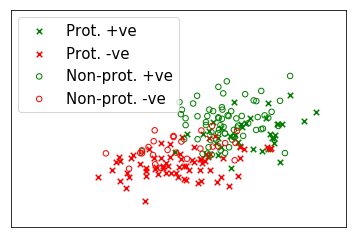

In [15]:
# Create synthetic data (X), labels (y) and sensitive features (x_control) - data for low discrimination (pi/4)
X_low,y_low,x_control_low = generate_synthetic_data(True, 4)

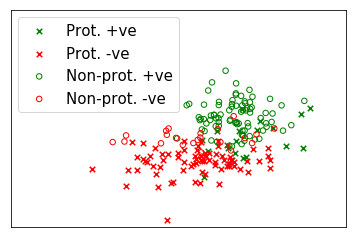

In [16]:
# Create synthetic data (X), labels (y) and sensitive features (x_control) - data for high discrimination (pi/8)
X_hi,y_hi,x_control_hi = generate_synthetic_data(True, 8)

## Fit standard SVM with linear kernel to synthetic data and compare with sklearn SVM. Print the parameters to compare

In [17]:
# Fit cvxopt implementation
clf2 = SupportVectorMachine(kernel=linear_kernel)
clf2.fit(X_low, y_low)

In [18]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_low, clf2.predict(X_low)))

Accuracy: 0.8695


In [19]:
# Fit the sklearn implementation
clf.fit(X_low, y_low)

print("Accuracy:",metrics.accuracy_score(y_low, clf.predict(X_low)))

Accuracy: 0.866


In [20]:
# Print sklearn weights and intercept
print("Sklearn intercept = ",clf.intercept_)
print("Sklearn weights = ",clf.coef_.flatten())

Sklearn intercept =  [-0.00913818]
Sklearn weights =  [0.2757715  0.58106685]


In [21]:
# Print cvxopt weights and intercept
print("cvxopt intercept = ",np.mean(clf2.b1))
print("cvxopt weights = ",clf2.w.flatten())

cvxopt intercept =  0.0587333824271059
cvxopt weights =  [0.27577177 0.58119972]


## Draw the decision boundary calculated by CVXOPT standard soft margin SVM and compare with sklearn

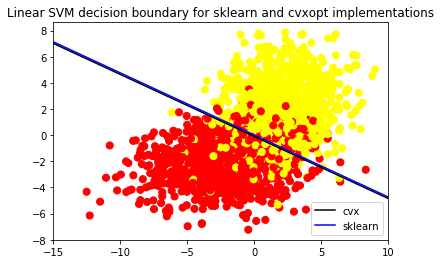

In [22]:
xfit = np.linspace(-15, 10)
# Plot labelled points
plt.scatter(X_low[:, 0], X_low[:, 1], c=y_low, s=50, cmap='autumn')

# Plot cvx decision boundary
plt.plot(xfit, (-clf2.w[0,0] * xfit-np.mean(clf2.b1))/clf2.w[1,0], '-k', label = "cvx")

# Plot sklearn decision boundary
plt.plot(xfit, (-clf.coef_[0,0] * xfit-clf.intercept_[0])/clf.coef_[0,1], '-b', label = "sklearn")

plt.xlim(-15, 10);
plt.title("Linear SVM decision boundary for sklearn and cvxopt implementations")
plt.legend()

## Decision threshold and model parameters are the same for sklearn and cvxopt implementations

## Next define the sensitive features and the fair SVM class

In [23]:
# z_normal is z - z_bar
z_low_normal = x_control_low["s1"]-np.mean(x_control_low["s1"])

In [24]:
# reshape y and z to single column vector
#y_low = y_low.reshape(-1,1)
#z_low_normal = z_low_normal.reshape(-1,1)

In [95]:
class Fair_SupportVectorMachine(object):
    """The Support Vector Machine classifier.
    Uses cvxopt to solve the quadratic optimization problem.

    Parameters:
    -----------
    C: float
        Penalty term.
    kernel: function
        Kernel function. Can be either polynomial, rbf or linear.
    power: int
        The degree of the polynomial kernel. Will be ignored by the other
        kernel functions.
    gamma: float
        Used in the rbf kernel function.
    coef: float
        Bias term used in the polynomial kernel function.
    """
    def __init__(self, C=1.0, kernel=rbf_kernel, power=4, gamma=None, coef=4):
        self.C = C
        self.kernel = kernel
        self.power = power
        self.gamma = gamma
        self.coef = coef
        self.lagr_multipliers = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.intercept = None

    def fit(self, X, y, z, c):

        n_samples, n_features = np.shape(X)

        # Set gamma to 1/n_features by default
        if not self.gamma:
            self.gamma = 1 / n_features

        # Initialize kernel method with parameters
        self.kernel = self.kernel(
            power=self.power,
            gamma=self.gamma,
            coef=self.coef)

        # Calculate kernel matrix k and constraint matrix g
        kernel_matrix = np.zeros((n_samples, n_samples))
        constraint_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.kernel(X[i], X[j])
                constraint_matrix[i,j] = z[i]*y[j]*kernel_matrix[i,j]

        # Define the quadratic optimization problem
        P = cvxopt.matrix(((np.outer(y,y))*(kernel_matrix+(1/self.C)*(np.eye(n_samples)))), tc='d')
        q = cvxopt.matrix(-np.ones(n_samples))
        A = cvxopt.matrix(y, (1, n_samples), tc='d')
        b = cvxopt.matrix(0, tc='d')

        G_1 = np.identity(n_samples) * -1
        G_2 = (constraint_matrix)#*(1/n_samples)
        G_3 = -(constraint_matrix)#*(1/n_samples)
        G_4 = np.identity(n_samples)
        G = cvxopt.matrix(np.vstack((G_1, G_2, G_3)))
        h_1 = cvxopt.matrix(np.zeros(n_samples))
        h_2 = cvxopt.matrix(np.ones(n_samples) * c)
        h_3 = cvxopt.matrix(np.ones(n_samples) * c)
        h_4 = cvxopt.matrix(np.ones(n_samples) * self.C)
        h = cvxopt.matrix(np.vstack((h_1, h_2, h_3)))

        # Solve the quadratic optimization problem using cvxopt
        minimization = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        lagr_mult = np.ravel(minimization['x'])
        self.all_multipliers = lagr_mult
        #w parameter in vectorized form
        #self.w = ((y * self.all_multipliers).T @ X).reshape(-1,1)

        # Extract support vectors
        # Get indexes of non-zero lagr. multipiers
        idx = lagr_mult > 1e-4
        # Get the corresponding lagr. multipliers
        self.lagr_multipliers = lagr_mult[idx]
        # Get the samples that will act as support vectors
        self.support_vectors = X[idx]
        # Get the corresponding labels
        self.support_vector_labels = y[idx]
        
        self.w = ((y[idx] * self.lagr_multipliers).T @ X[idx]).reshape(-1,1)
        
        # Calculate intercept with first support vector
        self.intercept = self.support_vector_labels[0]
        for i in range(len(self.lagr_multipliers)):
            self.intercept -= self.lagr_multipliers[i] * self.support_vector_labels[
                i] * self.kernel(self.support_vectors[i], self.support_vectors[0])

        #self.b = y[idx].reshape(-1,1) - np.dot(X[idx], self.w)
        
        # Calculate kernel matrix
        kernel_matrix_sv = np.zeros((self.support_vectors.shape[0], self.support_vectors.shape[0]))
        for i in range(self.lagr_multipliers.shape[0]):
            for j in range(self.support_vectors.shape[0]):
                kernel_matrix_sv[i, j] = self.kernel(self.support_vectors[i], self.support_vectors[j])
                
        self.b1 = self.support_vector_labels - self.support_vector_labels*self.lagr_multipliers@kernel_matrix_sv
            
    def predict(self, X):
        y_pred = []
        # Iterate through list of samples and make predictions
        for sample in X:
            prediction = 0
            # Determine the label of the sample by the support vectors
            for i in range(len(self.lagr_multipliers)):
                prediction += self.lagr_multipliers[i] * self.support_vector_labels[
                    i] * self.kernel(self.support_vectors[i], sample)
            prediction += np.mean(self.b1)#self.intercept
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)

## Test the fair SVM on the low discrimination synthetic data and compare with the sklearn unfair SVM

In [96]:
fair_SVM_low = Fair_SupportVectorMachine(kernel = linear_kernel, C=1.0)

In [97]:
fair_SVM_low.fit(X_low,y_low,z_low_normal,c=0.5)

In [98]:
y_pred = fair_SVM_low.predict(X_low)
# Model Accuracy: how often is the classifier correct?


In [99]:
# Print fair_SVM weights and intercept
print("Fair_SVM intercept = ",np.mean(fair_SVM_low.b1))
print("Fair_SVM weights = ",fair_SVM_low.w.flatten())
print("Fair_SVM Accuracy:",metrics.accuracy_score(y_low, y_pred))

Fair_SVM intercept =  0.014631379405155683
Fair_SVM weights =  [0.00372544 0.11569797]
Fair_SVM Accuracy: 0.846


In [100]:
# Compare with unfair sklearn weights and intercept
print("Sklearn intercept = ",clf.intercept_)
print("Sklearn weights = ",clf.coef_.flatten())
print("Sklearn Accuracy:",metrics.accuracy_score(y_low, clf.predict(X_low)))

Sklearn intercept =  [-0.00913818]
Sklearn weights =  [0.2757715  0.58106685]
Sklearn Accuracy: 0.866


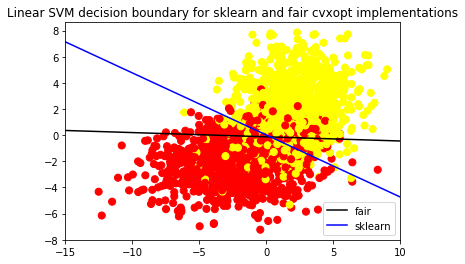

In [101]:
# Overlay decision boundaries
xfit = np.linspace(-15, 10)
plt.scatter(X_low[:, 0], X_low[:, 1], c=y_low[:], s=50, cmap='autumn')

# fair SVM decision boundary
plt.plot(xfit, (-fair_SVM_low.w[0,0] * xfit-np.mean(fair_SVM_low.b1))/fair_SVM_low.w[1,0], '-k', label = "fair")

# skleanr unfair decision boundary
plt.plot(xfit, (-clf.coef_[0,0] * xfit-clf.intercept_[0])/clf.coef_[0,1], '-b', label = "sklearn")

plt.xlim(-15, 10);
plt.title("Linear SVM decision boundary for sklearn and fair cvxopt implementations")
plt.legend()

In [102]:
compute_p_rule(x_control_low["s1"],y_pred)

34.18751154675819

## No change in the accuracy or decision boundary with the fair SVM implementation. The SVM weights have changed (~ 1/2 the value of the unfair classifier's weights) but the decision boundary slope has not

In [105]:
thresholds = [1, 0.8, 0.5, 0.1, 0.08, 0.05, 0.01, 0.008, 0.005] 
record = np.zeros((len(thresholds),5))
for i,c_threshold in enumerate(thresholds):
    fair_SVM_low = Fair_SupportVectorMachine(kernel = linear_kernel, C=1.0)
    fair_SVM_low.fit(X_low,y_low,z_low_normal,c=c_threshold)
    y_pred = fair_SVM_low.predict(X_low)
    record[i,0] = metrics.accuracy_score(y_low, y_pred)
    record[i,1] = np.mean(fair_SVM_low.b1)
    record[i,2] = fair_SVM_low.w[0,0]
    record[i,3] = fair_SVM_low.w[1,0]
    record[i,4] = compute_p_rule(x_control_low["s1"], y_pred)

In [106]:
record

array([[ 8.69000000e-01,  1.72332144e-02,  6.19231273e-02,
         1.90326019e-01,  4.04202570e+01],
       [ 8.68000000e-01,  1.62401682e-02,  3.84448766e-02,
         1.60609323e-01,  3.96106633e+01],
       [ 8.46000000e-01,  1.46313794e-02,  3.72544315e-03,
         1.15697973e-01,  3.41875115e+01],
       [ 8.33500000e-01, -4.69926038e-03, -5.21298410e-04,
         2.21170473e-02,  2.99922536e+01],
       [ 8.40500000e-01, -5.55607049e-03,  9.39261457e-05,
         1.83678921e-02,  3.00260530e+01],
       [ 8.27500000e-01, -6.07960944e-03, -2.07441172e-04,
         1.12367156e-02,  2.61682187e+01],
       [ 5.86000000e-01, -7.82674065e-03, -3.85830753e-04,
         2.07516513e-03,  5.84357967e+00],
       [ 5.00500000e-01, -8.76470071e-03, -8.34463541e-04,
         1.04273669e-03,  0.00000000e+00],
       [ 4.55500000e-01, -8.06267239e-03, -1.25303128e-03,
        -7.10018619e-05,  1.45139709e+02]])

(-10, 15)

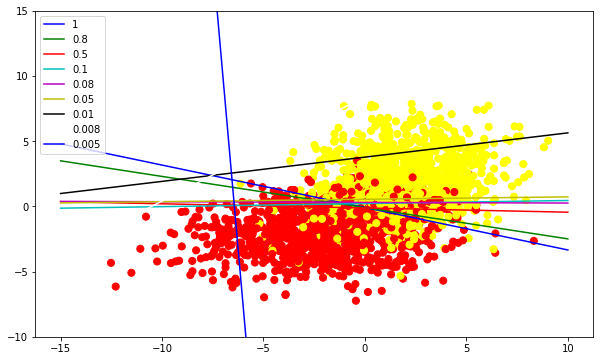

In [119]:
plt.figure(figsize=(10,6))
xfit = np.linspace(-15, 10)
plt.scatter(X_low[:, 0], X_low[:, 1], c=y_low[:], s=50, cmap='autumn')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']
for row in range(record.shape[0]):
    # fair SVM decision boundary
    plt.plot(xfit, (-record[row,2] * xfit-record[row,1])/record[row,3], c = colors[row], label = str(thresholds[row]))
plt.legend()
plt.ylim(-10,15)

Text(0, 0.5, 'Accuracy')

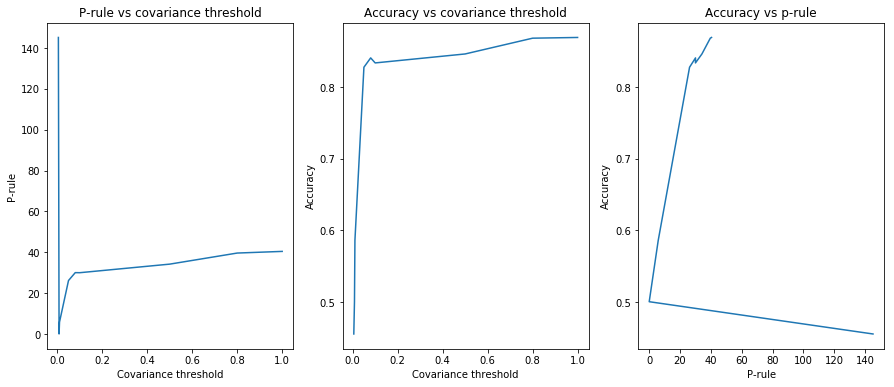

In [120]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(thresholds,record[:,4])
plt.title("P-rule vs covariance threshold")
plt.xlabel("Covariance threshold")
plt.ylabel("P-rule")
plt.subplot(132)
plt.plot(thresholds, record[:,0])
plt.title("Accuracy vs covariance threshold")
plt.xlabel("Covariance threshold")
plt.ylabel("Accuracy")
plt.subplot(133)
plt.plot(record[:,4],record[:,0])
plt.title("Accuracy vs p-rule")
plt.xlabel("P-rule")
plt.ylabel("Accuracy")

# <font color = "red"> Below here the notebook is WIP, importing and processing bank data set to prepare for fair SVM fitting </font>

http://www.nathanielhobbs.com/documents/cvx_opt/cvx_opt_final_report.pdf

In [678]:
def compute_p_rule(x_control, class_labels):

    """ Compute the p-rule based on Doctrine of disparate impact """

    non_prot_all = sum(x_control == 1.0) # non-protected group
    prot_all = sum(x_control == 0.0) # protected group
    non_prot_pos = sum(class_labels[x_control == 1.0] == 1.0) # non_protected in positive class
    prot_pos = sum(class_labels[x_control == 0.0] == 1.0) # protected in positive class
    frac_non_prot_pos = float(non_prot_pos) / float(non_prot_all)
    frac_prot_pos = float(prot_pos) / float(prot_all)
    p_rule = (frac_prot_pos / frac_non_prot_pos) * 100.0
    #print
    #print "Total data points: %d" % (len(x_control))
    #print "# non-protected examples: %d" % (non_prot_all)
    #print "# protected examples: %d" % (prot_all)
    #print "Non-protected in positive class: %d (%0.0f%%)" % (non_prot_pos, non_prot_pos * 100.0 / non_prot_all)
    #print "Protected in positive class: %d (%0.0f%%)" % (prot_pos, prot_pos * 100.0 / prot_all)
    #print "P-rule is: %0.0f%%" % ( p_rule )
    return p_rule

In [682]:
compute_p_rule(x_control_low["s1"],y_low)

47.90144110402635

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("bank.csv",sep=';',header='infer')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
y_bank = [1 if yy == "yes" else -1 for yy in df["y"]]
df.pop("y")
X_bank = pd.get_dummies(df)

In [13]:
X_bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [15]:
X_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 51 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_divorced       4521 non-null uint8
marital_married        4521 non-n

In [16]:
z_age = [1 if yy > 25 and yy < 60 else 0 for yy in X_bank["age"]]

In [22]:
mean_age = np.mean(z_age)

In [19]:
X_bank.pop("age")

0       30
1       33
2       35
3       30
4       59
5       35
6       36
7       39
8       41
9       43
10      39
11      43
12      36
13      20
14      31
15      40
16      56
17      37
18      25
19      31
20      38
21      42
22      44
23      44
24      26
25      41
26      55
27      67
28      56
29      53
        ..
4491    35
4492    32
4493    28
4494    26
4495    48
4496    30
4497    31
4498    31
4499    45
4500    38
4501    34
4502    42
4503    60
4504    42
4505    32
4506    42
4507    33
4508    42
4509    51
4510    36
4511    46
4512    40
4513    49
4514    38
4515    32
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4521, dtype: int64

In [811]:
import os,sys
from random import seed, shuffle
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)
def get_one_hot_encoding(in_arr):
    """
        input: 1-D arr with int vals -- if not int vals, will raise an error
        output: m (ndarray): one-hot encoded matrix
                d (dict): also returns a dictionary original_val -> column in encoded matrix
    """

    for k in in_arr:
        if str(type(k)) != "<type 'numpy.float64'>" and type(k) != int and type(k) != np.int64:
            print(str(type(k)))
            print("************* ERROR: Input arr does not have integer types")
            return None
        
    in_arr = np.array(in_arr, dtype=int)
    assert(len(in_arr.shape)==1) # no column, means it was a 1-D arr
    attr_vals_uniq_sorted = sorted(list(set(in_arr)))
    num_uniq_vals = len(attr_vals_uniq_sorted)
    if (num_uniq_vals == 2) and (attr_vals_uniq_sorted[0] == 0 and attr_vals_uniq_sorted[1] == 1):
        return in_arr, None

    
    index_dict = {} # value to the column number
    for i in range(0,len(attr_vals_uniq_sorted)):
        val = attr_vals_uniq_sorted[i]
        index_dict[val] = i

    out_arr = []    
    for i in range(0,len(in_arr)):
        tup = np.zeros(num_uniq_vals)
        val = in_arr[i]
        ind = index_dict[val]
        tup[ind] = 1 # set that value of tuple to 1
        out_arr.append(tup)

    return np.array(out_arr), index_dict

def load_adult_data(load_data_size=None):

    """
        if load_data_size is set to None (or if no argument is provided), then we load and return the whole data
        if it is a number, say 10000, then we will return randomly selected 10K examples
    """

    attrs = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'] # all attributes
    int_attrs = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'] # attributes with integer values -- the rest are categorical
    sensitive_attrs = ['sex'] # the fairness constraints will be used for this feature
    attrs_to_ignore = ['sex', 'race' ,'fnlwgt'] # sex and race are sensitive feature so we will not use them in classification, we will not consider fnlwght for classification since its computed externally and it highly predictive for the class (for details, see documentation of the adult data)
    attrs_for_classification = set(attrs) - set(attrs_to_ignore)

    # adult data comes in two different files, one for training and one for testing, however, we will combine data from both the files
    data_files = ["adultdata.txt"]



    X = []
    y = []
    x_control = {}

    attrs_to_vals = {} # will store the values for each attribute for all users
    for k in attrs:
        if k in sensitive_attrs:
            x_control[k] = []
        elif k in attrs_to_ignore:
            pass
        else:
            attrs_to_vals[k] = []

    for f in data_files:
        
        for line in open(f):
            line = line.strip()
            if line == "": continue # skip empty lines
            line = line.split(", ")
            if len(line) != 15 or "?" in line: # if a line has missing attributes, ignore it
                continue

            class_label = line[-1]
            if class_label in ["<=50K.", "<=50K"]:
                class_label = -1
            elif class_label in [">50K.", ">50K"]:
                class_label = +1
            else:
                raise Exception("Invalid class label value")

            y.append(class_label)


            for i in range(0,len(line)-1):
                attr_name = attrs[i]
                attr_val = line[i]
                # reducing dimensionality of some very sparse features
                if attr_name == "native_country":
                    if attr_val!="United-States":
                        attr_val = "Non-United-Stated"
                elif attr_name == "education":
                    if attr_val in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
                        attr_val = "prim-middle-school"
                    elif attr_val in ["9th", "10th", "11th", "12th"]:
                        attr_val = "high-school"

                if attr_name in sensitive_attrs:
                    x_control[attr_name].append(attr_val)
                elif attr_name in attrs_to_ignore:
                    pass
                else:
                    attrs_to_vals[attr_name].append(attr_val)

    def convert_attrs_to_ints(d): # discretize the string attributes
        for attr_name, attr_vals in d.items():
            if attr_name in int_attrs: continue
            uniq_vals = sorted(list(set(attr_vals))) # get unique values

            # compute integer codes for the unique values
            val_dict = {}
            for i in range(0,len(uniq_vals)):
                val_dict[uniq_vals[i]] = i

            # replace the values with their integer encoding
            for i in range(0,len(attr_vals)):
                attr_vals[i] = val_dict[attr_vals[i]]
            d[attr_name] = attr_vals

    
    # convert the discrete values to their integer representations
    convert_attrs_to_ints(x_control)
    convert_attrs_to_ints(attrs_to_vals)


    # if the integer vals are not binary, we need to get one-hot encoding for them
    for attr_name in attrs_for_classification:
        attr_vals = attrs_to_vals[attr_name]
        if attr_name in int_attrs or attr_name == "native_country": # the way we encoded native country, its binary now so no need to apply one hot encoding on it
            X.append(attr_vals)

        else:            
            attr_vals, index_dict = get_one_hot_encoding(attr_vals)
            for inner_col in attr_vals.T:                
                X.append(inner_col) 


    # convert to numpy arrays for easy handline
    X = np.array(X, dtype=float).T
    y = np.array(y, dtype = float)
    for k, v in x_control.items(): x_control[k] = np.array(v, dtype=float)
        
    # shuffle the data
    perm = [i for i in range(0,len(y))]
    #perm = range(0,len(y)) # shuffle the data before creating each fold
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    for k in x_control.keys():
        x_control[k] = x_control[k][perm]

    # see if we need to subsample the data
    if load_data_size is not None:
        #print "Loading only %d examples from the data" % load_data_size
        X = X[:load_data_size]
        y = y[:load_data_size]
        for k in x_control.keys():
            x_control[k] = x_control[k][:load_data_size]

    return X, y, x_control

In [812]:
X_adult, y_adult, x_control_adult = load_adult_data()

In [816]:
x_control_adult["sex"]

array([1., 1., 1., ..., 1., 0., 1.])

In [47]:


n_samples, n_features = np.shape(X_low)
kernel = linear_kernel
C=1 # regularisation term
c=0.0004 # covariance threshold

kernel_matrix = kernel(X_low,X_low)

#kernel_matrix = np.zeros((n_samples, n_samples))
#for i in range(n_samples):
#    for j in range(n_samples):
#        kernel_matrix[i, j] = kernel(X[i], X[j])        
        
# Define the quadratic optimization problem
P = cvxopt.matrix(((kernel_matrix+(1/C)*(np.eye(n_samples)))*(y_low.dot(y_low.T))), tc='d')
q = cvxopt.matrix(-np.ones(n_samples))
A = cvxopt.matrix(y_low, (1, n_samples), tc='d')
b = cvxopt.matrix(0, tc='d')

G_1 = np.identity(n_samples) * -1
G_2 = (1/n_samples)*(kernel_matrix*np.dot(z_low_normal,y_low.T))
G_3 = - (1/n_samples)*(kernel_matrix*np.dot(z_low_normal,y_low.T))
#G_4 = np.identity(n_samples)
G = cvxopt.matrix(np.vstack((G_1, G_2, G_3)))
h_1 = np.zeros(n_samples)
h_2 = np.ones(n_samples) * c
h_3 = np.ones(n_samples) * c
#h_4 = np.ones(n_samples) * C
h = cvxopt.matrix(np.vstack((h_1, h_2, h_3)).reshape(-1,1))